In [ ]:
"""
1. Во время сессии (партии) в D&D для очередной проверки игроку понадобилось

бросить четыре дайса d6 (это игральные кости с шестью гранями, занумерованны-
ми числами от 1 до 6). По правилам для успешного прохождения данной проверки

игроку нужно набрать сумму очков на дайсах, равную 22 или больше. В результа-
те броска игрок прошел проверку. Протестируйте на уровне значимости α = 0.01

гипотезу H0 = ’дайсы честные’ (то есть, все грани выпадают с одинаковыми веро-
ятностями) против гипотезы H1 = ’дайсы нечестные и завышают результат’ (то есть,

грани с большим числом очков выпадают чаще). В качесте ответа приведите p-value в
виде десятичной дроби, а также результат теста: отвергать гипотезу H0 или нет. Дать
подробное решение.
"""

In [166]:
import collections
import itertools
import typing

import scipy.stats as stats


# Generic solution for any amount of dices with any values :)
TOTAL_DICES: typing.Final = 4
MIN_DICE_VALUE: typing.Final = 1
MAX_DICE_VALUE: typing.Final = 6
MIN_DICES_SUM: typing.Final = TOTAL_DICES * MIN_DICE_VALUE
MAX_DICES_SUM: typing.Final = TOTAL_DICES * MAX_DICE_VALUE
SIGNIFICANCE_LEVEL: typing.Final = .01

def is_dices_fair(dice_sum: int) -> None:
    assert TOTAL_DICES > 0
    assert MIN_DICE_VALUE < MAX_DICE_VALUE

    if not (MIN_DICES_SUM <= dice_sum <= MAX_DICES_SUM):
        raise ValueError(
            f"{TOTAL_DICES} dices sum variates like: "
            f"{MIN_DICES_SUM} <= sum <= {MAX_DICES_SUM}"
        )
    
    # Idk, but it seems like there is MAX_DICES_SUM - MIN_DICES_SUM + 1 possible ways to sum TOTAL_DICES dice's values
    # Hence, we need MAX_DICES_SUM - MIN_DICES_SUM (a.k.a. degrees of freedom) buckets
    # Here they are, from left to right...

    # Get all possible combinations with TOTAL_DICES
    all_possible_dices_sum = list(itertools.product(
        range(MIN_DICE_VALUE, MAX_DICE_VALUE + 1), 
        repeat=TOTAL_DICES
    ))

    # Now we want to count, how much times each sum has appeared
    combination_sum_counter: typing.Final = collections.Counter(
        list(map(sum, all_possible_dices_sum))
    )

    # Now we count probability of each sum to appear
    # Don't worry: values, keys and items collecitons.Counter methods returning sorted values
    sum_probabilities: typing.Final = [
        times_appeared / len(all_possible_dices_sum) for 
        times_appeared in combination_sum_counter.values()
    ]
    print(sum_probabilities)
    # Now everything is simple, we make contingency table
    # We have only 1 position for dice sum to appear and that position is dice_sum - 1
    contingency_table: typing.Final = [
        [int(dice_sum - TOTAL_DICES == current_index), sum_probability] 
        for current_index, sum_probability in enumerate(sum_probabilities)
    ]

    chi2_contingency_table(contingency_table)

def chi2_contingency_table(
        contingency_table: list[list[int, float]]
) -> typing.Any:
    """
    The formula for the chi-squared (χ²) statistic for a contingency table is given by:

    χ² = Σ [(O - E)² / E]

    Where:

    χ² is the chi-squared statistic.
    Σ represents the summation symbol (summing over all cells in the table).
    O is the observed frequency in a cell.
    E is the expected frequency in the same cell.
    """
    chi2_statistic = sum([
        (observed_frequency - expected_frequency)**2 / expected_frequency
        for observed_frequency, expected_frequency in contingency_table
    ])
    # As was told, we can use scipy to get chi2 critical level
    chi2_critical = stats.chi2.ppf(1 - SIGNIFICANCE_LEVEL, len(contingency_table) - 1)
    print(chi2_critical)
    # Our result is actually matches with library answer!
    chi2, p_value = stats.chisquare([item[0] for item in contingency_table], f_exp=[item[1] for item in contingency_table])
    print(f"Self calculated {chi2_statistic = }")
    print(f"Library calculated chi2_statistic = {chi2}")
    print(1 - stats.chi2.cdf(chi2, df=20))
    print(p_value)


In [167]:
is_dices_fair(22)

[0.0007716049382716049, 0.0030864197530864196, 0.007716049382716049, 0.015432098765432098, 0.02700617283950617, 0.043209876543209874, 0.06172839506172839, 0.08024691358024691, 0.09645061728395062, 0.10802469135802469, 0.11265432098765432, 0.10802469135802469, 0.09645061728395062, 0.08024691358024691, 0.06172839506172839, 0.043209876543209874, 0.02700617283950617, 0.015432098765432098, 0.007716049382716049, 0.0030864197530864196, 0.0007716049382716049]
37.56623478662507
Self calculated chi2_statistic = 128.60000000000002
Library calculated chi2_statistic = 128.60000000000002
0.0
7.132804762530701e-18


In [140]:
# Degrees of freedom for the chi-squared distribution
degrees_of_freedom = 5  # Replace with your specific degrees of freedom

# Critical chi-squared value (obtained from tables or other sources)
critical_chi2 = 10.589  # Replace with your specific critical value

# Calculate the p-value using the chi-squared distribution
p_value = 1 - stats.chi2.cdf(critical_chi2, degrees_of_freedom)
p_value


0.06016611104836589

In [69]:
chi2_contingency_table([[176, 230], [21035, 21018]])

[[176, 230], [21035, 21018]]
12.692010988510884
Chi2ContingencyResult(statistic=7.156900855345259, pvalue=0.007467611213568741, dof=1, expected_freq=array([[  202.82309993,   203.17690007],
       [21008.17690007, 21044.82309993]]))


In [174]:
import collections

from mpmath import mp
mp.dps = 100_000

c = collections.Counter(str(mp.pi)[2:])

In [178]:
print(sum([(val - 10000)**2 / 10000 for val in c.values()]))
print(1 - stats.chi2.cdf(4.0985, df=9))

4.0985
0.9048106041814732


In [270]:
"""Задача №3"""
import matplotlib.pyplot as plt
import numpy as np

def regression(y_values, x_values) -> tuple[float, float]:
    y_values = np.array(y_values)
    x_values = np.array(x_values)
    # Инициализируем параметры
    a = 0.0
    b = 0.0
    learning_rate = 0.01  # Шаг обучения
    epochs = 10000  # Количество эпох для обучения

    # Производим градиентый спуск
    for _ in range(epochs):
        # Вычисляем предсказания
        y_pred = a * x_values + b

        # Вычисляем градиенты
        gradient_a = (-2 / len(x_values)) * np.sum(x_values * (y_values - y_pred))
        gradient_b = (-2 / len(x_values)) * np.sum(y_values - y_pred)

        # Обновляем параметры
        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b

    return a, b

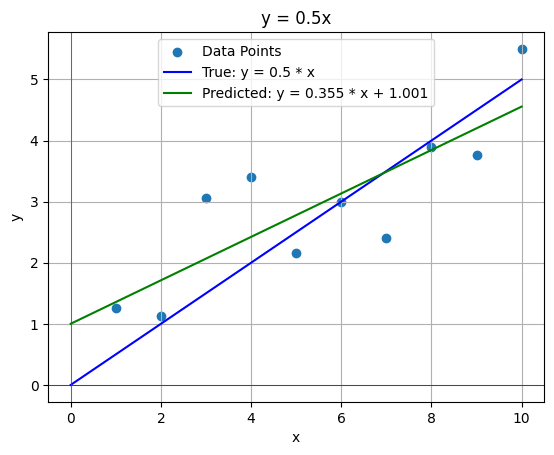

In [289]:
def main():
    # Генерируем точки
    data_points = [[np.random.normal(loc=0.5*i, scale=1), i] for i in range(1, 11)]
    y_values, x_values = zip(*data_points)

    pred_a, pred_b = regression(y_values, x_values)
    plt.scatter(x_values, y_values, label='Data Points')

    # Генерируем значения x
    x = np.linspace(0, 10, 100)  # Генерируем 100 точек от 0 до 10

    # Вычисляем значение y
    y = 0.5 * x

    # Создаем график
    plt.plot(x, y, color='blue', label=f'Истинная зависимость: y = 0.5 * x')

    # Добавляем лейблы и заголовок
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Задача №3')

    pred_y = pred_a * x + pred_b
    plt.plot(
        x, 
        pred_y, 
        color='green', 
        label=f'Предсказанная зависимость: y = {round(pred_a, 3)} * x + {round(pred_b, 3)}'
    )
    plt.legend()

    # Показываем график
    plt.grid(True)
    plt.axhline(0, color='blue', linewidth=0.5)
    plt.axvline(0, color='green', linewidth=0.5)
    plt.show()

main()